<a href="https://colab.research.google.com/github/NiteeshSingh/Covid-19-Analysis/blob/main/Covid_19_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go

import os
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
world_daily = pd.read_csv('/content/drive/MyDrive/WIDS Project/DATASET/global data/worldometer_coronavirus_daily_data.csv')
world_summ = pd.read_csv('/content/drive/MyDrive/WIDS Project/DATASET/global data/worldometer_coronavirus_summary_data.csv')
india_statewise = pd.read_csv('/content/drive/MyDrive/WIDS Project/DATASET/india data/covid_19_india.csv')
vacc_statewise = pd.read_csv('/content/drive/MyDrive/WIDS Project/DATASET/india data/covid_vaccine_statewise.csv')

# Analysing the Impact at Global Level
 Which will help to realise how widespread this disease is. 

##first look and cleaning the data 


In [ ]:
world_summ.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,158275,7367.0,145750.0,5158.0,1124.0,3932,183.0,826810.0,20541.0,40250878
1,Albania,Europe,213257,3228.0,202077.0,7952.0,23.0,74227,1124.0,1495002.0,520354.0,2873049
2,Algeria,Africa,220415,6310.0,151347.0,62758.0,34.0,4893,140.0,230861.0,5125.0,45046063
3,Andorra,Europe,25289,141.0,21511.0,3637.0,31.0,326512,1820.0,249838.0,3225714.0,77452
4,Angola,Africa,86636,1789.0,67477.0,17370.0,7.0,2518,52.0,1296669.0,37686.0,34407243


In [ ]:
world_summ.info()
print("\n Total number of unique Countries", len(pd.unique(world_summ["country"])))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         221 non-null    object 
 1   continent                       221 non-null    object 
 2   total_confirmed                 221 non-null    int64  
 3   total_deaths                    211 non-null    float64
 4   total_recovered                 214 non-null    float64
 5   active_cases                    214 non-null    float64
 6   serious_or_critical             157 non-null    float64
 7   total_cases_per_1m_population   221 non-null    int64  
 8   total_deaths_per_1m_population  211 non-null    float64
 9   total_tests                     208 non-null    float64
 10  total_tests_per_1m_population   208 non-null    float64
 11  population                      221 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [ ]:
#Droping the  serious_or_critical column
world_summ_cleaned = world_summ.drop(["serious_or_critical"], axis=1)
is_NaN = world_summ_cleaned.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = world_summ_cleaned[row_has_NaN]
rows_with_NaN

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
27,British Virgin Islands,North America,3760,40.0,NaN,NaN,123137,1310.0,93379.0,3058097.0,30535
43,China Macao Sar,Asia,79,NaN,77.0,2.0,119,NaN,5075.0,7658.0,662699
46,Comoros,Africa,7405,158.0,5650.0,1597.0,8250,176.0,NaN,NaN,897548
68,Falkland Islands Malvinas,South America,84,NaN,NaN,NaN,23121,NaN,8528.0,2347371.0,3633
73,French Polynesia,Australia/Oceania,46474,636.0,NaN,NaN,164010,2244.0,NaN,NaN,283361
89,Holy See,Europe,27,NaN,27.0,0.0,33582,NaN,NaN,NaN,804
124,Marshall Islands,Australia/Oceania,4,NaN,4.0,0.0,67,NaN,NaN,NaN,59793
130,Micronesia,Australia/Oceania,1,NaN,1.0,0.0,9,NaN,NaN,NaN,116844
144,Nicaragua,North America,17526,213.0,4225.0,13088.0,2599,32.0,NaN,NaN,6743566
153,Peru,South America,2318543,202904.0,NaN,NaN,68870,6027.0,21999418.0,653475.0,33665283


In [ ]:
##droping all the countries having nan values
world_summ_cleaned = world_summ_cleaned.dropna(axis=0, how="any", inplace=False)

In [ ]:
world_summ_cleaned.head()

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,158275,7367.0,145750.0,5158.0,3932,183.0,826810.0,20541.0,40250878
1,Albania,Europe,213257,3228.0,202077.0,7952.0,74227,1124.0,1495002.0,520354.0,2873049
2,Algeria,Africa,220415,6310.0,151347.0,62758.0,4893,140.0,230861.0,5125.0,45046063
3,Andorra,Europe,25289,141.0,21511.0,3637.0,326512,1820.0,249838.0,3225714.0,77452
4,Angola,Africa,86636,1789.0,67477.0,17370.0,2518,52.0,1296669.0,37686.0,34407243


##Looking and plotting the cleaned data

calculating the total confirmed, recovered, actice cases throught the world

In [ ]:
print(f"Total Confirmed Cases So far {world_summ.total_confirmed.sum()}")
print(f"Total Recovered Cases So far {world_summ.total_recovered.sum()}")
print(f"Total Active Cases So far {world_summ.active_cases.sum()}")
print(f"Total Deaths so far {world_summ.total_deaths.sum()}")
print(f"Total Population {world_summ.population.sum()}")

Total Confirmed Cases So far 299040599
Total Recovered Cases So far 255368603.0
Total Active Cases So far 35982432.0
Total Deaths so far 5485341.0
Total Population 7873291916


In [ ]:
print(f"recovery rate at global level {255368603/299040599}")
print(f"death rate at global level {5485341/299040599}")
print(f"positivity rate at global level {299040599/world_summ.total_tests.sum()}")

recovery rate at global level 0.8539596424497531
death rate at global level 0.018343131395346088
positivity rate at global level 0.06308854068105743


(array([       0., 10000000., 20000000., 30000000., 40000000., 50000000.,
        60000000., 70000000.]), <a list of 8 Text major ticklabel objects>)

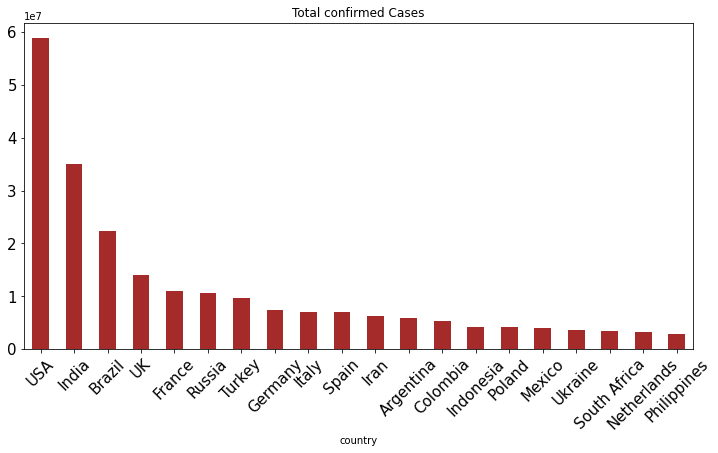

In [ ]:
top_20 = world_summ.groupby('country')['total_confirmed'].max().sort_values(ascending = False).head(20)
top_20.plot(x='country',y=['total_confirmed'],kind = "bar",figsize = (12 , 6),color = "brown",title="Total confirmed Cases")
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)

plotting worldwide distribution of active and recovred cases per million population which gives some idea how the corona cases are spread worldwide

In [ ]:
world_summ['log(Total Confirmed)'] = np.log2(world_summ['total_confirmed'])
world_summ['log(Total Recovered)'] = np.log2(world_summ['total_recovered'])

fig = px.choropleth(world_summ,
                    locations="country",
                    color="log(Total Confirmed)",
                    locationmode = 'country names',
                    color_continuous_scale='reds',
                    title = '<b>Confirmed Cases Around The Globe</b>')
fig.show()
fig = px.choropleth(world_summ,
                    locations="country",
                    color="log(Total Recovered)",
                    locationmode = 'country names',
                    color_continuous_scale='greens',
                    title = '<b>Recovered Cases Around The Globe</b>')
fig.show()

#Focusing on trend in three countries mainly USA, China, India
which will help to understand how different countries of different economic and political stand tackeled the situation which country was successfull so far.

##looking at datewise dataset

###cleaning and making subset for three countries

In [ ]:
world_daily.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [ ]:
world_daily.info()
print(world_daily.columns)
world_daily.isna().sum(axis=0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152735 entries, 0 to 152734
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     152735 non-null  object 
 1   country                  152735 non-null  object 
 2   cumulative_total_cases   152735 non-null  float64
 3   daily_new_cases          145244 non-null  float64
 4   active_cases             147898 non-null  float64
 5   cumulative_total_deaths  145825 non-null  float64
 6   daily_new_deaths         129468 non-null  float64
dtypes: float64(5), object(2)
memory usage: 8.2+ MB
Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths'],
      dtype='object')


date                           0
country                        0
cumulative_total_cases         0
daily_new_cases             7491
active_cases                4837
cumulative_total_deaths     6910
daily_new_deaths           23267
dtype: int64

making a subset of data for three countries

In [ ]:
countries = ['USA', 'China', 'India']
world_daily_subset = world_daily[world_daily.country.isin(countries)]
world_daily_subset.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
30404,2020-1-22,China,571.0,NaN,554.0,17.0,NaN
30405,2020-1-23,China,830.0,259.0,771.0,25.0,8.0
30406,2020-1-24,China,1287.0,457.0,1208.0,41.0,16.0
30407,2020-1-25,China,1975.0,688.0,1870.0,56.0,15.0
30408,2020-1-26,China,2744.0,769.0,2613.0,80.0,24.0


In [ ]:
world_daily_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 30404 to 146515
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     2097 non-null   object 
 1   country                  2097 non-null   object 
 2   cumulative_total_cases   2097 non-null   float64
 3   daily_new_cases          2094 non-null   float64
 4   active_cases             2097 non-null   float64
 5   cumulative_total_deaths  2097 non-null   float64
 6   daily_new_deaths         2086 non-null   float64
dtypes: float64(5), object(2)
memory usage: 131.1+ KB


In [ ]:
is_NaN = world_daily_subset.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = world_daily_subset[row_has_NaN]
rows_with_NaN

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
30404,2020-1-22,China,571.0,NaN,554.0,17.0,NaN
64287,2020-2-15,India,3.0,NaN,0.0,0.0,NaN
64288,2020-2-16,India,3.0,0.0,0.0,0.0,NaN
64289,2020-2-17,India,3.0,0.0,0.0,0.0,NaN
64290,2020-2-18,India,3.0,0.0,0.0,0.0,NaN
64291,2020-2-19,India,3.0,0.0,0.0,0.0,NaN
145825,2020-2-15,USA,15.0,NaN,12.0,0.0,NaN
145826,2020-2-16,USA,15.0,0.0,12.0,0.0,NaN
145827,2020-2-17,USA,15.0,0.0,12.0,0.0,NaN
145828,2020-2-18,USA,15.0,0.0,12.0,0.0,NaN


The values which are NaN are typically the dates when the corona spread has started in those countries so we can assume that those values as 0. 

In [ ]:
world_daily_subset.fillna(0, inplace=True)
world_daily_subset['date'] = pd.to_datetime(world_daily_subset['date'], format = '%Y-%m-%d')
world_daily_subset.isna().sum(axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



date                       0
country                    0
cumulative_total_cases     0
daily_new_cases            0
active_cases               0
cumulative_total_deaths    0
daily_new_deaths           0
dtype: int64

In [ ]:
world_daily_subset.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
30404,2020-01-22,China,571.0,0.0,554.0,17.0,0.0
30405,2020-01-23,China,830.0,259.0,771.0,25.0,8.0
30406,2020-01-24,China,1287.0,457.0,1208.0,41.0,16.0
30407,2020-01-25,China,1975.0,688.0,1870.0,56.0,15.0
30408,2020-01-26,China,2744.0,769.0,2613.0,80.0,24.0


##different plots for three countries

Text(0.5, 1.0, 'Datewise trend of total cases')

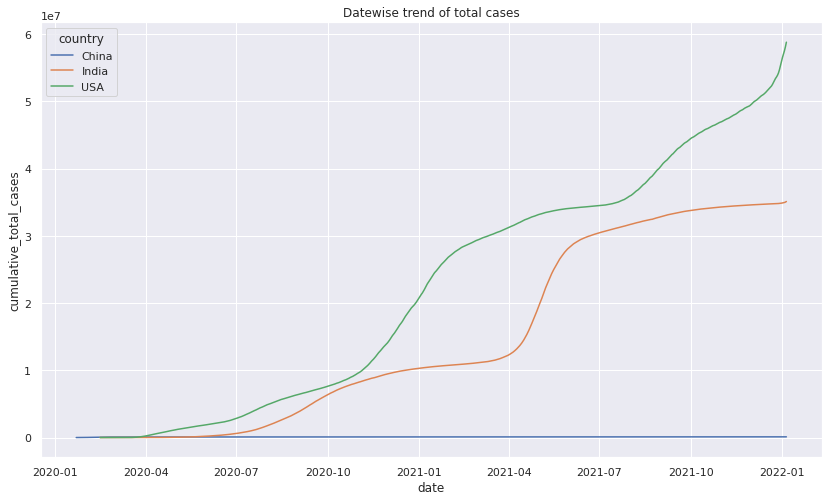

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")

sns.lineplot(x="date", y="cumulative_total_cases", hue="country", data=world_daily_subset)
plt.title("Datewise trend of total cases")

Text(0.5, 1.0, 'Datewise trend of Daily New Cases cases')

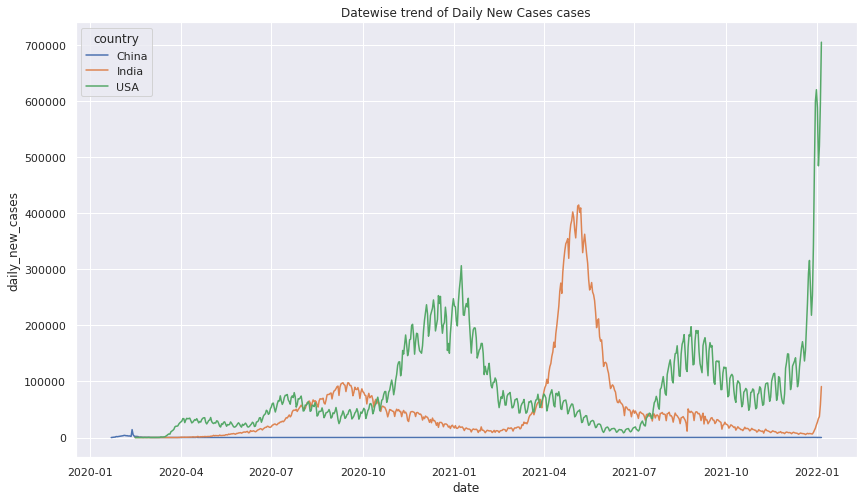

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")

sns.lineplot(x="date", y="daily_new_cases", hue="country", data=world_daily_subset)
plt.title("Datewise trend of Daily New Cases cases")

Text(0.5, 1.0, 'Datewise trend of Daily New Deaths')

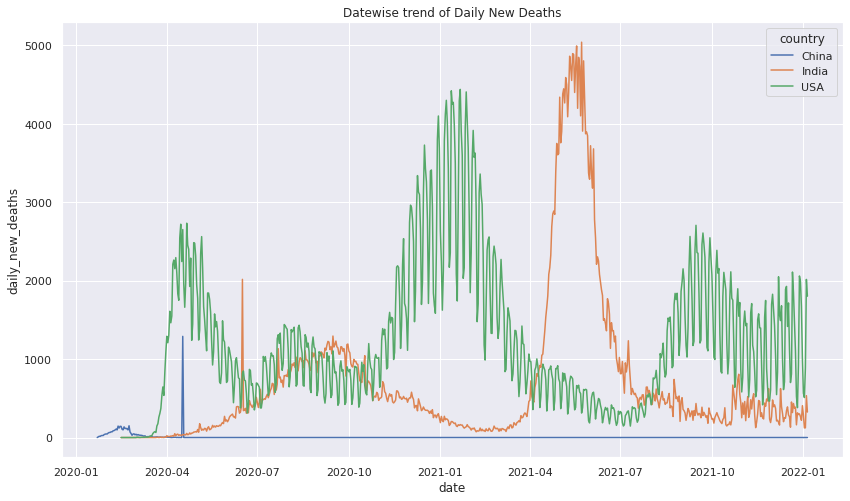

In [ ]:
plt.figure(figsize=(14, 8))
sns.set_theme(style="darkgrid")

sns.lineplot(x="date", y="daily_new_deaths", hue="country", data=world_daily_subset)
plt.title("Datewise trend of Daily New Deaths")

so as we can see china was quite successful in controling the spread of disease it was only in the starting that the cases was high. wheras in other two countries there are other two peaks in graph indicating two waves of corona virus. USA is in top of total number of cases. and as the cases rising there is a possibility of third wave.


#Now analysing the trend in india

##scraping dataset for India from complete dataset and loading statewise dataset and cleaning 

In [ ]:
india_statewise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
india_summ = india_statewise.groupby('Date').agg({"Cured":"sum", "Deaths":"sum", "Confirmed":"sum"})
india_summ['Date'] = india_summ.index
india_summ.head()

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 192, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.7/dist-packages/google/colab/data_table.py", line 168, in _preprocess_dataframe
    dataframe = dataframe.reset_index()
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4859, in reset_index
    new_obj.insert(0, name, level_values)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 3628, in insert
    self._mgr.insert(loc, column, value, allow_duplicates=allow_duplicates)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/internals/managers.py", line 1186, in insert
    raise ValueError(f"cannot insert {item}, already exists")
ValueError: cannot insert Date, already exists


,Cured,Deaths,Confirmed,Date
Date,,,,
2020-01-30,0,0,1,2020-01-30
2020-01-31,0,0,1,2020-01-31
2020-02-01,0,0,2,2020-02-01
2020-02-02,0,0,3,2020-02-02
2020-02-03,0,0,3,2020-02-03


In [ ]:
india_summ.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 2020-01-30 to 2021-08-11
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Cured      560 non-null    int64 
 1   Deaths     560 non-null    int64 
 2   Confirmed  560 non-null    int64 
 3   Date       560 non-null    object
dtypes: int64(3), object(1)
memory usage: 21.9+ KB


In [ ]:
vacc_statewise.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Sputnik V (Doses Administered),AEFI,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [ ]:
vacc_statewise_sub = vacc_statewise[["Updated On", "Total Doses Administered"]]
vacc_statewise_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Updated On                7845 non-null   object 
 1   Total Doses Administered  7621 non-null   float64
dtypes: float64(1), object(1)
memory usage: 122.7+ KB


In [ ]:
is_NaN = vacc_statewise_sub.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = vacc_statewise_sub[row_has_NaN]
rows_with_NaN

,Updated On,Total Doses Administered
206,10/08/2021,NaN
207,11/08/2021,NaN
208,12/08/2021,NaN
209,13/08/2021,NaN
210,14/08/2021,NaN
...,...,...
7840,11/08/2021,NaN
7841,12/08/2021,NaN
7842,13/08/2021,NaN
7843,14/08/2021,NaN


In [ ]:
vacc_datewise = vacc_statewise_sub.dropna()
vacc_datewise = vacc_datewise.rename(columns={"Updated On":"Date"})
vacc_datewise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7621 entries, 0 to 7838
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      7621 non-null   object 
 1   Total Doses Administered  7621 non-null   float64
dtypes: float64(1), object(1)
memory usage: 178.6+ KB


In [ ]:
vacc_datewise.head()

,Date,Total Doses Administered
0,16/01/2021,48276.0
1,17/01/2021,58604.0
2,18/01/2021,99449.0
3,19/01/2021,195525.0
4,20/01/2021,251280.0


##ploting the cured, deaths, confirmed


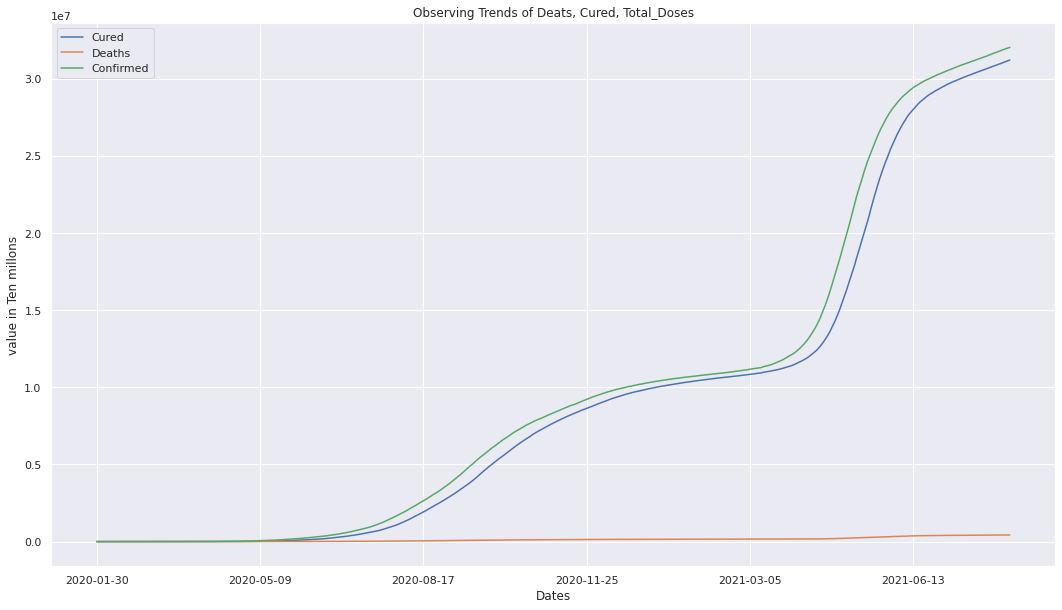

In [ ]:
india_summ.plot(x="Date", y=["Cured", "Deaths", "Confirmed"],
                       xlabel = "Dates",
                       ylabel = "value in Ten millons",
                       title  = "Observing Trends of Deats, Cured, Total_Doses",
        kind="line", figsize=(18, 10))

##plotting Recovery Rate

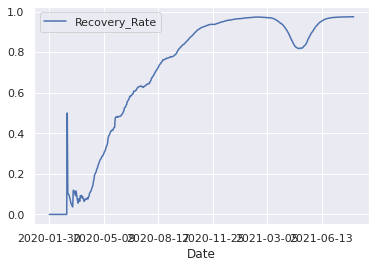

In [ ]:
india_summ['Recovery_Rate'] = india_summ["Cured"]/india_summ["Confirmed"]
india_summ.plot(x="Date", y="Recovery_Rate")

Mortality Ratio

In [ ]:
print("Mortality Ratio for India is", india_summ.Deaths.sum()/india_summ.Confirmed.sum())

Mortality Ratio for India is 0.013461726050547042


##statewise Trends

In [ ]:
Total=pd.DataFrame(india_statewise.groupby("State/UnionTerritory")["Confirmed","Deaths","Cured"].sum()).sort_values("Confirmed",ascending=False).reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
fig = px.bar(Total, x='State/UnionTerritory', y='Confirmed', height=900, color='Deaths', title='Cases per State')
fig.show()

In [ ]:
india_statewise.info()
india_statewise['Date'] = pd.to_datetime(india_statewise['Date'], format = '%Y-%m-%d')
# world_daily_subset['date'] = pd.to_datetime(world_daily_subset['date'], format = '%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [ ]:
states = ['Karnataka', 'Maharashtra','Jammu and Kashmir', 'Punjab', 'Haryana', 'Uttar Pradesh', 'Rajasthan']
india_statewise_sub = india_statewise[india_statewise['State/UnionTerritory'].isin(states)]
india_statewise_sub['Date'] = pd.to_datetime(india_statewise_sub['Date'], format = '%Y-%m-%d')
india_statewise_sub.info()
# countries = ['USA', 'China', 'India']
# world_daily_subset = world_daily[world_daily.country.isin(countries)]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3661 entries, 36 to 18108
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       3661 non-null   int64         
 1   Date                      3661 non-null   datetime64[ns]
 2   Time                      3661 non-null   object        
 3   State/UnionTerritory      3661 non-null   object        
 4   ConfirmedIndianNational   3661 non-null   object        
 5   ConfirmedForeignNational  3661 non-null   object        
 6   Cured                     3661 non-null   int64         
 7   Deaths                    3661 non-null   int64         
 8   Confirmed                 3661 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 286.0+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
vacc_statewise_sub = vacc_statewise[vacc_statewise['State'].isin(states)]
#vacc_statewise_sub['Date'] = pd.to_datetime(vacc_statewise_sub['Updated On'], format = '%Y-%m-%d')
vacc_statewise_sub.info()
# vacc_statewise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1484 entries, 2545 to 7420
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           1484 non-null   object 
 1   State                                1484 non-null   object 
 2   Total Doses Administered             1442 non-null   float64
 3   Sessions                             1442 non-null   float64
 4    Sites                               1442 non-null   float64
 5   First Dose Administered              1442 non-null   float64
 6   Second Dose Administered             1442 non-null   float64
 7   Male (Doses Administered)            1442 non-null   float64
 8   Female (Doses Administered)          1442 non-null   float64
 9   Transgender (Doses Administered)     1442 non-null   float64
 10   Covaxin (Doses Administered)        1442 non-null   float64
 11  CoviShield (Doses Administe

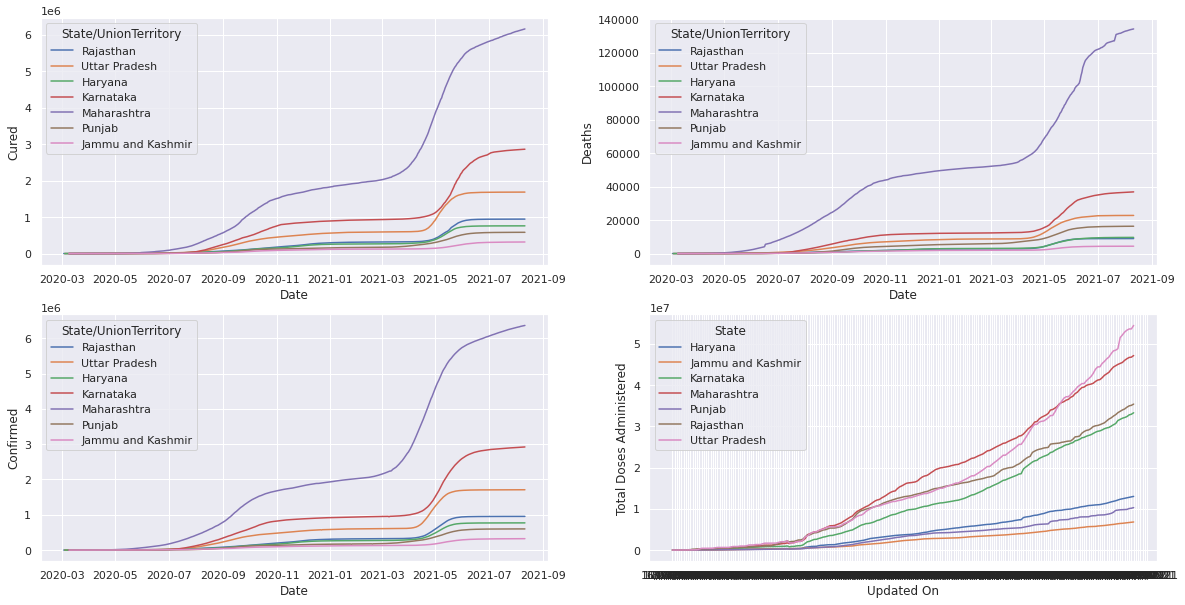

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20,10))
sns.lineplot(data = india_statewise_sub, x="Date", y="Cured", hue="State/UnionTerritory", ax=axes[0,0])
sns.lineplot(data = india_statewise_sub, x="Date", y="Deaths", hue="State/UnionTerritory", ax=axes[0,1])
sns.lineplot(data = india_statewise_sub, x="Date", y="Confirmed", hue="State/UnionTerritory", ax=axes[1,0])
sns.lineplot(data = vacc_statewise_sub, x="Updated On", y="Total Doses Administered", hue="State", ax=axes[1,1])

#Training a model which will predict the number of cases for perticular day

In [ ]:
india_statewise.head()
india_statewise.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [ ]:
data_ml = india_statewise.drop(columns=["Time", "ConfirmedForeignNational", "ConfirmedIndianNational", "Date"])

In [ ]:
data_ml = data_ml.rename(columns={"Sno":"No_of_Days"})
data_ml.head()

,No_of_Days,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,Kerala,0,0,1
1,2,Kerala,0,0,1
2,3,Kerala,0,0,2
3,4,Kerala,0,0,3
4,5,Kerala,0,0,3


In [ ]:
number = LabelEncoder()
data_ml['State/UnionTerritory'] = number.fit_transform(data_ml['State/UnionTerritory'].astype('str'))
data_ml.head()

,No_of_Days,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,22,0,0,1
1,2,22,0,0,1
2,3,22,0,0,2
3,4,22,0,0,3
4,5,22,0,0,3


splitting into training and test data

In [ ]:
X = data_ml[["No_of_Days", "State/UnionTerritory", "Cured", "Deaths"]]
y = data_ml[["Confirmed"]]


In [ ]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

##Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 17549.23933617636
Mean Squared Error: 1596497875.2552953
Root Mean Squared Error: 39956.19945959945


In [ ]:
X_train.head()

,No_of_Days,State/UnionTerritory,Cured,Deaths
7342,7343,15,133706,1614
9296,9297,7,17128,297
13466,13467,1,890137,7239
12783,12784,0,4967,62
3925,3926,45,16291,827


##Polynomial Regression

In [ ]:
X_pol = X[["No_of_Days"]]
y_pol = y[["Confirmed"]]

In [ ]:
X_train_pol, X_test_pol, y_train_pol, y_test_pol = train_test_split(X_pol, y_pol, test_size=0.20)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree= 4)  
x_poly= poly_regs.fit_transform(X_train_pol) 
x_test_pol= poly_regs.fit_transform(X_test_pol)  
lin_reg_2 =LinearRegression()  
lin_reg_2.fit(x_poly, y_train_pol)  

LinearRegression()

In [ ]:
y_pred_pol = lin_reg_2.predict(x_test_pol)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_pol, y_pred_pol))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_pol, y_pred_pol)))

Mean Absolute Error: 297865.6879742383
Root Mean Squared Error: 600527.7468139336
